In [24]:
import numpy as np
from pingouin import multivariate_normality
import pandas as pd

#### Посмотрим, как выглядят наши данные

In [27]:
df = pd.read_csv('geant-flat-tms.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,520,521,522,523,524,525,526,527,528,529
0,2005-01-01-00-30,69.6444,20232.5778,122882.9333,25398.7289,325161.9022,13041.9644,16813.0489,187022.5333,365524.2311,...,13.0844,393.1378,208.6933,2654.8622,446.6756,123.5911,2160.0533,1621.0133,550.9333,0.0
1,2005-01-01-00-45,87.2711,13492.2667,92576.8000,24758.3378,293427.0667,10384.0089,16609.5556,168308.5244,338674.7822,...,13.6889,63.0756,729.5289,2076.1689,144.2667,285.4311,93.6889,1112.3200,431.0933,0.0
2,2005-01-01-01-00,90.9778,9087.5911,91189.7244,22493.5111,286134.1333,11318.3467,13874.8089,174435.7867,346972.5156,...,76.7289,27.6622,265.8044,3000.2133,490.6044,136.4444,37.5911,1776.4800,181.8133,0.0
3,2005-01-01-01-15,61.9111,8170.8533,88612.8000,21266.4356,293284.5689,10474.4889,8959.4044,171889.7067,343563.6444,...,0.3556,545.6000,41.6889,3270.6400,714.8444,80.8978,1889.6089,842.5600,193.1378,0.0
4,2005-01-01-01-30,70.3022,10583.6000,59640.5244,27762.3911,297451.9378,9275.0400,7836.8622,174344.0800,337112.0889,...,0.0000,67.4489,58.5689,758.8978,1179.5556,78.3200,175.1467,763.5378,827.2178,0.0


- мы исходим из предположения, что данные распределены нормально: каждая строчка в таблице является гауссовским вектором: $\mathbf {X} =(X_{1},\ldots ,X_{n})^{\top }$.
    - Если вектор $\mathbf {X} =(X_{1},\ldots ,X_{n})^{\top }$ имеет многомерное нормальное распределение, то его компоненты $X_{i},i=1,\ldots ,n,$ имеют одномерное нормальное распределение.

Постороим гистрограммы одномерных компонент вектора и сравним с плотностью c параметрами:  $\ \mathcal {N} \ ( \text{Sample Mean}, \ \text{Sample Var})$

Мы должны наблюдать приблизительно следующую картину:

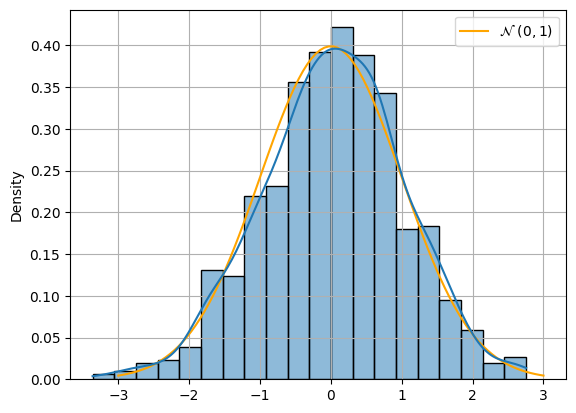

In [201]:
import seaborn as sns
mu, sigma = 0, 1

normal_samples = np.random.normal(mu, sigma, 1000)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.grid()
sns.lineplot(x=x, y=stats.norm.pdf(x, mu, sigma), label='$ \mathcal {N} \ (0, 1) $', color='orange')
sns.histplot(normal_samples, bins=20, label='Hist by samples', kde=True, stat='density')
#plt.legend(loc='upper left')
plt.show()

Теперь посмотрим, на некоторые одномерные и двумерные векторы по нашим данным.

In [202]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_hist(df, i, bins=30):

    mu = df[i].mean()
    sigma = df[i].std()
    plt.grid()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    sns.lineplot(x=x, y=stats.norm.pdf(x, mu, sigma), label='$ \mathcal {N} \ ( \ Sample Mean \ , \ Var) $', color='orange')
    sns.histplot(df[i], bins=bins, label='Histogram by data', kde=True, stat='density')

In [203]:
def plot_multiimages(indices, columns = 2, rows = 2, bins = 30):
    fig = plt.figure(figsize=(15, 8))
    columns = 2
    rows = 2
    for ind, i in zip(indices, range(1, columns*rows +1)):
        fig.add_subplot(rows, columns, i)
        plot_hist(df, ind, 45)
    plt.show()

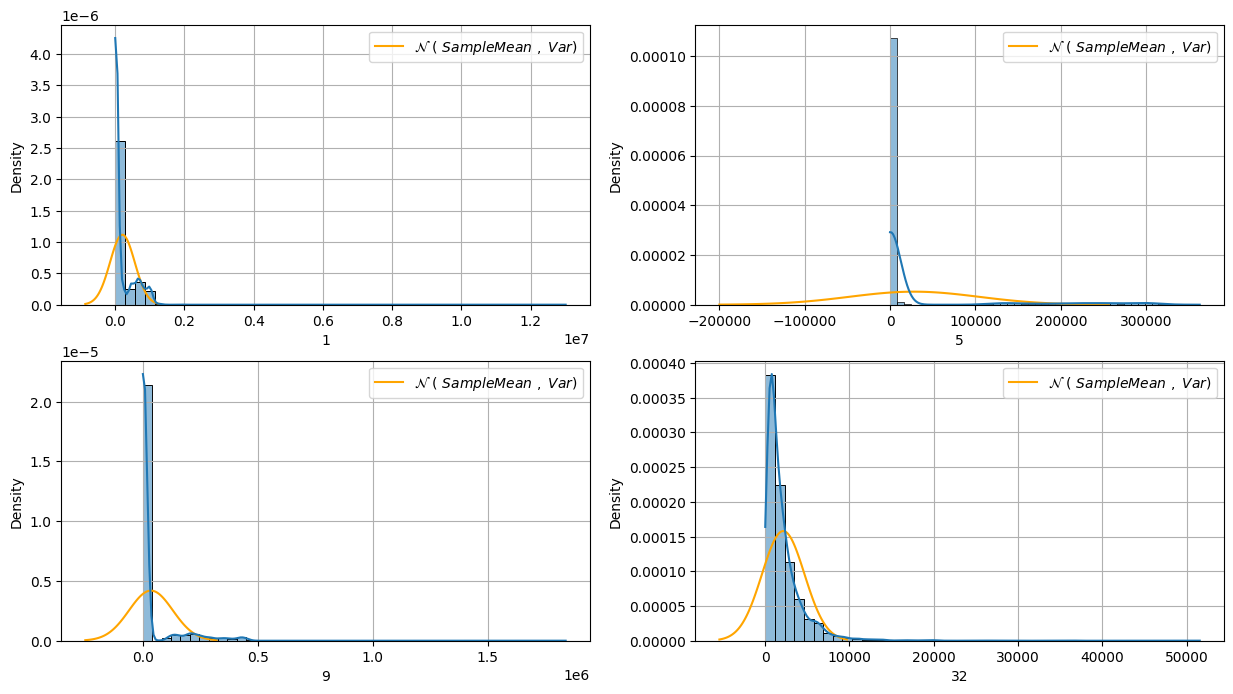

In [204]:
indices = [1, 5, 9, 32, 34, 93, 87, 108]

plot_multiimages(indices=indices[:4])

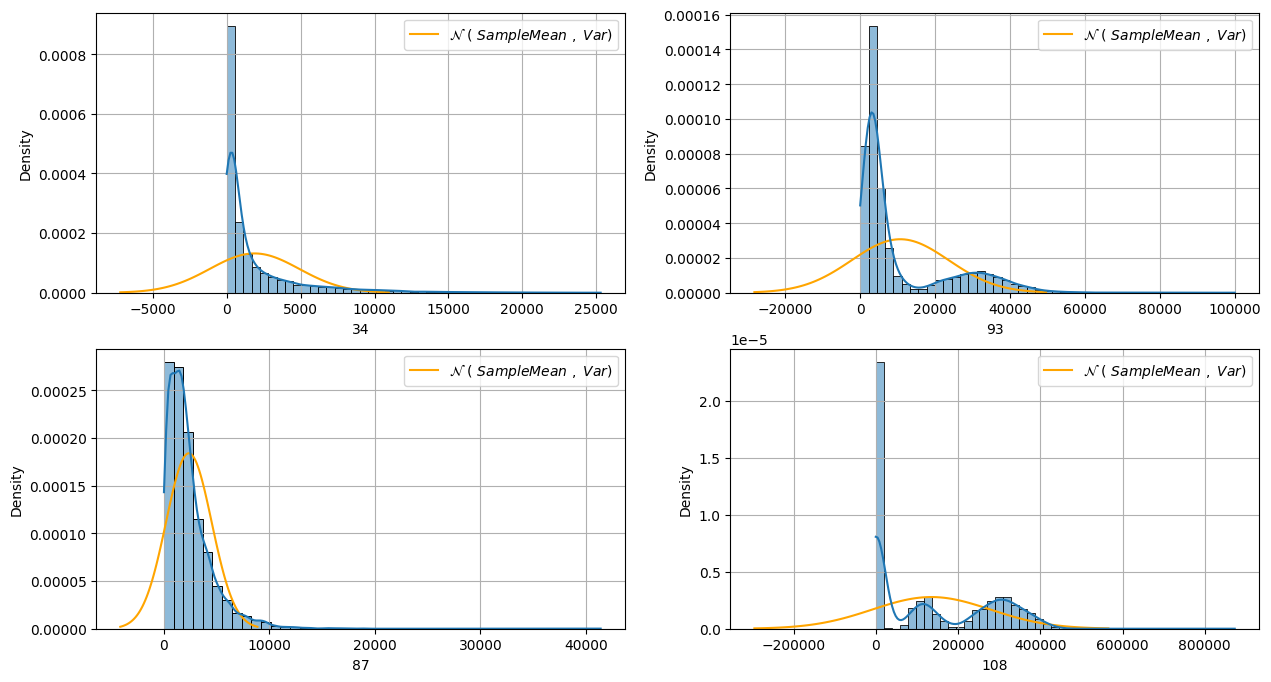

In [205]:
plot_multiimages(indices=indices[4:])

- На реальных данных наблюдаем:
    - довольно скошенное распределение
    - встречаются многомодальные распределения

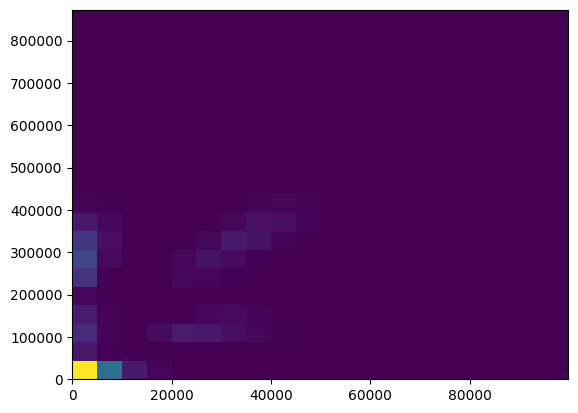

In [176]:
plt.hist2d(df[indices[5]], df[indices[7]], bins=20, density=True)[3]

- Проверим данные на нормальность с помощью теста Хенце-Цирклера на уровне значимости $\alpha=0.05$. Он определяет, соответствует ли группа переменных многомерному нормальному распределению. Нулевая и альтернативная гипотезы для теста следующие:

    - $H_0$: нулевая гипотеза - переменные подчиняются многомерному нормальному распределению

    - $H_1$: альтернатива - переменные не подчиняются многомерному нормальному распределению.

In [210]:
multivariate_normality(df.drop([0], axis=1).to_numpy(), alpha=0.05)

HZResults(hz=43088, pval=nan, normal=False)

- Поскольку p-значение теста меньше заданного нами значения $\alpha$, равного $0.05$, мы можем отвергнуть нулевую гипотезу. 
- Можно предположить, что набор данных не подчиняется многомерному нормальному распределению.